In [1]:

# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from scipy import ndimage,misc


In [2]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap='gray')
    plt.title('y = '+ str(data_sample[1].item()))

In [3]:
def show_data1(dataset,sample):

    plt.imshow(dataset.x[sample,0,:,:].numpy(),cmap='gray')
    plt.title('y='+str(dataset.y[sample].item()))
    plt.show()

In [4]:
IMAGESIZE = 16
compose = transforms.Compose([transforms.Resize((IMAGESIZE,IMAGESIZE)), transforms.ToTensor()])

In [5]:
train_data = dsets.MNIST(root = "./", download = True, train = True, transform = compose)
validation_data = dsets.MNIST(root = "./", download = True, train = False, transform = compose)

In [6]:
class cnn(nn.Module):
    def __init__(self, out1 =2, out2 =2):
        super(cnn,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1 , out_channels= out1, kernel_size=2, padding= 0)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride= 1)
        
        self.cnn2 = nn.Conv2d(in_channels=out1, out_channels= out2, kernel_size= 2, padding= 0)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride= 1)
        
        self.fclayer1 = nn.Linear(out2*7*7, 2)
    
    def forward(self,x):
        #first Cnn layer
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        
        #second Cnn Layer
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        
        #flatten the output and fully connected layer
        x = x.view(x.size(0),-1)
        x = self.fclayer1(x)
        
        return(x)
    
    def activation(self, x):
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        #second Cnn Layer
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out = self.maxpool2(a2)
        
        #flatten the output and fully connected layer
        out = out.view(out.size(0),-1)
        
        return z1,a1,z2,a2,out

In [7]:
class cnn2(nn.Module):
    def __init__(self,out1 = 16,out2 =32):
        super(cnn2,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels= 1, out_channels = out1, kernel_size= 5, padding = 2)
        self.max1 = nn.MaxPool2d(kernel_size= 2)
        
        self.cnn2 = nn.Conv2d(in_channels = out1 ,out_channels = out2, kernel_size = 5, stride = 1, padding = 2)
        self.max2 = nn.MaxPool2d(kernel_size = 2)
        
        self.fcl = nn.Linear(out2 * 4 * 4, 10)
    
    def forward(self,x):
        #first Cnn layer
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.max1(x)
        
        #second Cnn Layer
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.max2(x)
        
        #flatten the output and fully connected layer
        x = x.view(x.size(0),-1)
        x = self.fcl(x)
        
        return(x)
    
    def activation(self, x):
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.max1(a1)
        
        #second Cnn Layer
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out = self.max2(a2)
        
        #flatten the output and fully connected layer
        out = out.view(out.size(0),-1)
        
        return z1,a1,z2,a2,out
        
        
        

In [34]:
class CNN3(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN3, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.cnn1_b = nn.BatchNorm2d(out_1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.cnn2_b = nn.BatchNorm2d(out_2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.cnn1_b(x)
        x = torch.relu(x)        
        x = self.maxpool1(x)
        
        x = self.cnn2(x)
        x = self.cnn2_b(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    # Outputs in each steps
    def activations(self, x):
        #outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

In [8]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self,N_images=100,offset=0,p=0.9, train=False):
        """
        p:portability that pixel is wight  
        N_images:number of images 
        offset:set a random vertical and horizontal offset images by a sample should be less than 3 
        """
        if train==True:
            np.random.seed(1)  
        
        #make images multiple of 3 
        N_images=2*(N_images//2)
        images=np.zeros((N_images,1,11,11))
        start1=3
        start2=1
        self.y=torch.zeros(N_images).type(torch.long)

        for n in range(N_images):
            if offset>0:
        
                low=int(np.random.randint(low=start1, high=start1+offset, size=1))
                high=int(np.random.randint(low=start2, high=start2+offset, size=1))
            else:
                low=4
                high=1
        
            if n<=N_images//2:
                self.y[n]=0
                images[n,0,high:high+9,low:low+3]= np.random.binomial(1, p, (9,3))
            elif  n>N_images//2:
                self.y[n]=1
                images[n,0,low:low+3,high:high+9] = np.random.binomial(1, p, (3,9))
           
        
        
        self.x=torch.from_numpy(images).type(torch.FloatTensor)
        self.len=self.x.shape[0]
        del(images)
        np.random.seed(0)
    def __getitem__(self,index):      
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [9]:
def plot_channels(W):
    #number of output channels 
    n_out=W.shape[0]
    #number of input channels 
    n_in=W.shape[1]
    w_min=W.min().item()
    w_max=W.max().item()
    fig, axes = plt.subplots(n_out,n_in)
    fig.subplots_adjust(hspace = 0.1)
    out_index=0
    in_index=0
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
    
        if in_index>n_in-1:
            out_index=out_index+1
            in_index=0
              
        ax.imshow(W[out_index,in_index,:,:], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index=in_index+1

    plt.show()

In [10]:
def plot_activations(A,number_rows= 1,name=""):
    A=A[0,:,:,:].detach().numpy()
    n_activations=A.shape[0]
    
    
    print(n_activations)
    A_min=A.min().item()
    A_max=A.max().item()

    if n_activations==1:

        # Plot the image.
        plt.imshow(A[0,:], vmin=A_min, vmax=A_max, cmap='seismic')

    else:
        fig, axes = plt.subplots(number_rows, n_activations//number_rows)
        fig.subplots_adjust(hspace = 0.4)
        for i,ax in enumerate(axes.flat):
            if i< n_activations:
                # Set the label for the sub-plot.
                ax.set_xlabel( "activation:{0}".format(i+1))

                # Plot the image.
                ax.imshow(A[i,:], vmin=A_min, vmax=A_max, cmap='seismic')
                ax.set_xticks([])
                ax.set_yticks([])
    plt.show()

In [12]:

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()

In [13]:

def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    #by Duane Nielsen
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [98]:
model = cnn(4,3)
model

cnn(
  (cnn1): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(4, 3, kernel_size=(2, 2), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fclayer1): Linear(in_features=147, out_features=2, bias=True)
)

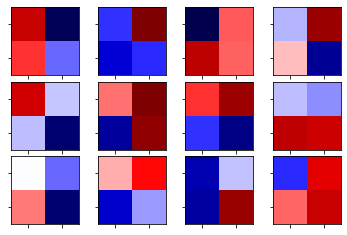

In [73]:
plot_channels(model.state_dict()['cnn2.weight'])

In [74]:
lossfunction = nn.CrossEntropyLoss()

In [20]:
lr = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr)

NameError: name 'model' is not defined

In [85]:
n_epoche = 10
totalcost =[]
totalaccurary=[]


In [81]:
train_dataset=Data(N_images=10000)
validation_dataset=Data(N_images=1000, train = False)

In [83]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 10)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 10)

In [100]:
for e in range(n_epoche):
    cost = 0
    for x,y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = lossfunction(z,y)
        loss.backward()
        optimizer.step()
        cost += loss
    totalcost.append(cost)
    
    correct=0
    for x,y in validation_loader:
        z = model(x)
        _,yhat = torch.max(z.data,1)
    
    correct += (yhat == y).sum()
    accuracy = correct / len(validation_dataset)
    totalaccurary.append(accuracy)

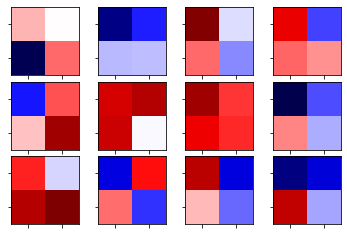

In [102]:
plot_channels(model.state_dict()['cnn2.weight'])

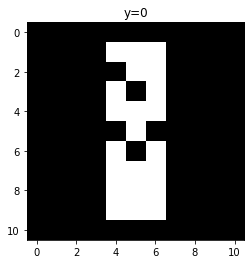

In [107]:
show_data1(train_dataset,1000//2+2)
out=model.activation(train_dataset[1000//2+2][0].view(1,1,11,11))

In [117]:
train_dataset[1000//2+2][0].view(1,1,11,11)

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]])

In [120]:
out

(tensor([[[[-0.1024, -0.1024, -0.1024, -0.1108, -0.1142, -0.1142, -0.1058,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.4316, -0.5651, -0.5684, -0.2308,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.1108, -0.4350, -0.5651, -0.2308,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.4401, -0.2392, -0.4434, -0.2308,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.4316, -0.5651, -0.5600, -0.2274,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.1108, -0.4350, -0.2359, -0.1058,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.4401, -0.2392, -0.4434, -0.2308,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.4401, -0.5684, -0.5684, -0.2308,
            -0.1024, -0.1024, -0.1024],
           [-0.1024, -0.1024, -0.1024, -0.4401, -0.5684, -0.5684, -0.2308,
     

4


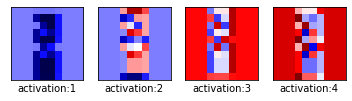

In [121]:
plot_activations(out[0],number_rows=1,name=" feature map")
plt.show()


4


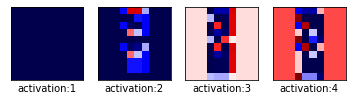

In [122]:
plot_activations(out[1],number_rows=1,name=" feature map")
plt.show()


3


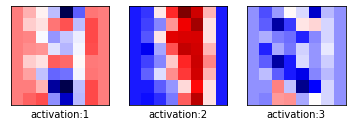

In [123]:
plot_activations(out[2],number_rows=1,name=" feature map")
plt.show()


In [134]:
out4 = out[4].detach().numpy()
out40 = out[4][0].detach().numpy()
out0=model.activation(train_dataset[100][0].view(1,1,11,11))[4][0].detach().numpy()
print (out4)
print (out40)

[[0.01824847 0.         0.02037928 0.03851314 0.03851314 0.04055344
  0.04055344 0.01824847 0.01443827 0.02037928 0.03851314 0.03851314
  0.04055344 0.04055344 0.01824847 0.01443827 0.0069415  0.
  0.         0.04055344 0.04055344 0.01824847 0.01012255 0.03223193
  0.03223193 0.02640797 0.03869586 0.03869586 0.01824847 0.00160518
  0.03223193 0.03223193 0.02640797 0.02118154 0.02118154 0.01824847
  0.01824847 0.         0.         0.         0.04055344 0.04055344
  0.03108156 0.03924489 0.03924489 0.         0.         0.04055344
  0.04055344 0.         0.         0.05688149 0.19361284 0.19361284
  0.1601052  0.         0.         0.         0.10103047 0.10944214
  0.1601052  0.1601052  0.         0.         0.         0.10103047
  0.13057968 0.13057968 0.11699978 0.         0.         0.
  0.03721353 0.13057968 0.13057968 0.12301046 0.01303916 0.
  0.         0.01073179 0.05882728 0.12301046 0.12301046 0.01303916
  0.         0.         0.01073179 0.04961249 0.11653733 0.11653733
  0.

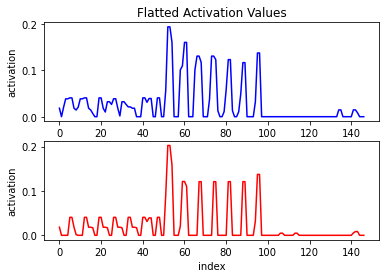

In [135]:
plt.subplot(2,1,1)
plt.plot(out40,'b')
plt.title('Flatted Activation Values')
plt.xlabel('index')
plt.ylabel('activation')
plt.subplot(2,1,2)
plt.plot(out0,'r')
plt.xlabel('index')
plt.ylabel('activation')
plt.show()

In [14]:
model2 = cnn2(16,32)
model2

cnn2(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (max1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (max2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fcl): Linear(in_features=512, out_features=10, bias=True)
)

In [15]:
x = model2.state_dict()['cnn1.weight']
print (x[:4])
print (x[:4][1])
print (x[:4][1][0])
print (x[:4][1][0][0])
print (x[:4][1][0][0][1])
print (x[1][0][0][1])
x.shape

tensor([[[[-0.1155, -0.0575,  0.0666, -0.0794,  0.1324],
          [ 0.0962,  0.1029, -0.0231, -0.1258, -0.1214],
          [-0.1788,  0.0259, -0.0430,  0.0960, -0.0217],
          [ 0.1155, -0.1603, -0.1027,  0.0752,  0.1891],
          [-0.1294, -0.0182, -0.1017,  0.1709,  0.1462]]],


        [[[-0.0659, -0.0988,  0.1931, -0.1443, -0.1361],
          [-0.1822, -0.1575,  0.0435, -0.0858,  0.0845],
          [-0.0406, -0.1430, -0.1554, -0.1472,  0.1645],
          [-0.1134, -0.1460, -0.0848,  0.0404, -0.0575],
          [ 0.1653,  0.1827, -0.1839,  0.0969,  0.0726]]],


        [[[ 0.0157,  0.1515,  0.0387, -0.0723, -0.1100],
          [ 0.1811,  0.0202, -0.1700, -0.0402, -0.1833],
          [-0.1024,  0.0764,  0.0457, -0.1358, -0.1354],
          [-0.0484,  0.1829,  0.0020, -0.0206,  0.1013],
          [-0.0762, -0.1743, -0.1908, -0.1908, -0.0297]]],


        [[[-0.0565, -0.1860,  0.1900,  0.0392,  0.1761],
          [-0.0095,  0.1013,  0.0095,  0.0232, -0.0681],
          [ 0.0189,

torch.Size([16, 1, 5, 5])

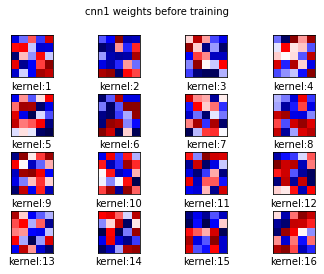

In [16]:
plot_parameters(model2.state_dict()['cnn1.weight'],4,'cnn1 weights before training',0)

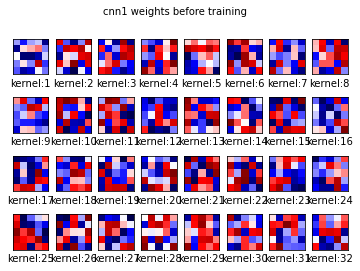

In [17]:
#print (model2.state_dict()['cnn2.weight'])
plot_parameters(model2.state_dict()['cnn2.weight'],4,'cnn1 weights before training', 1)

In [41]:
train_loader_m = torch.utils.data.DataLoader(dataset = train_data, batch_size = 100)
validation_loader_m = torch.utils.data.DataLoader(dataset = validation_data, batch_size =1000)

lr = 0.01
lossfunction = nn.CrossEntropyLoss()

In [43]:
n_epoche = 10
totalcost_n =[]
totalaccurary_n=[]
optimizer_m = torch.optim.Adam(model2.parameters(), lr)

n_test = len(validation_loader_m)

for e in range(n_epoche):
    cost = 0
    for x,y in train_loader_m:
        optimizer_m.zero_grad()
        z = model2(x)
        loss = lossfunction(z,y)
        loss.backward()
        optimizer_m.step()
        cost += loss.data
    
    totalcost_n.append(cost)

    
    accuracy = 0
    for x,y in validation_loader_m:
        z = model2(x)
        _,yhat = torch.max(z.data,1)
        accuracy += (yhat==y).sum().item()
    acc = accuracy/n_test
    
    totalaccurary_n.append(acc)
    
    
        

[tensor(23.5869), tensor(20.3561), tensor(25.3490), tensor(20.0659), tensor(22.8615), tensor(22.4038), tensor(19.3290), tensor(25.0822), tensor(22.7852), tensor(23.1026)]
[983.2, 981.2, 982.7, 982.7, 981.5, 983.0, 985.3, 982.5, 985.2, 984.4]


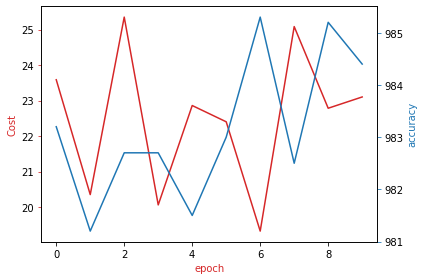

In [30]:
print (totalcost_n)
print (totalaccurary_n)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(totalcost_n, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( totalaccurary_n, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [42]:
model3 = CNN3(16,32)

lr = 0.01

lossfunction = nn.CrossEntropyLoss() 
model3

CNN3(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (cnn1_b): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2_b): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)

In [39]:
n_epoche = 10
totalcost_3 =[]
totalaccurary_3=[]
optimizer_3 = torch.optim.Adam(model3.parameters(), lr)

n_test = len(validation_loader_m)

for e in range(n_epoche):
    cost = 0
    for x,y in train_loader_m:
        optimizer_3.zero_grad()
        z = model3(x)
        loss = lossfunction(z,y)
        loss.backward()
        optimizer_3.step()
        cost += loss.data
    
    totalcost_3.append(cost)
   
    
    accuracy = 0
    for x,y in validation_loader_m:
        z = model3(x)
        _,yhat = torch.max(z.data,1)
        accuracy += (yhat==y).sum().item()
    acc = accuracy/n_test
    
    totalaccurary_3.append(acc)
   
    
        

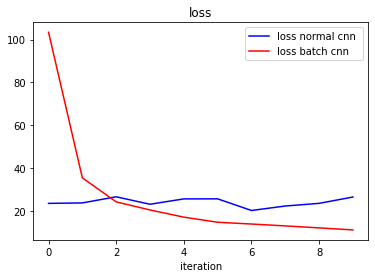

In [44]:
plt.plot(totalcost_n, 'b',label='loss normal cnn ')
plt.plot(totalcost_3,'r',label='loss batch cnn')
plt.xlabel('iteration')
plt.title("loss")
plt.legend()